In [8]:
import math
import matplotlib.pyplot as plt
import random as rnd
import numpy as np
import networkx as nx

from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings('ignore')

In [9]:
class Agent:
    def __init__(self):
        self.pos = 60
        self.links =[]
        
    def add_edge(self,agent):
        if agent != self:
            if agent not in self.links:
                self.links.append(agent) 
                
    def diffuse(self,mean):
        if len(self.links)>0:
            mean = 0
            for a in self.links:
                mean+=a.pos
            mean=mean/len(self.links)
        new_move = rnd.randint(-1,1) 
        if rnd.random()<((abs(self.pos-mean))/mean):
            if self.pos-mean<0:
                new_move = rnd.random()
            else:
                new_move = -rnd.random()
        self.pos+=new_move

In [10]:
def test_agent():
    test_agent = Agent()
    for _ in range(10):
        test_agent.diffuse()
        print(test_agent.pos)

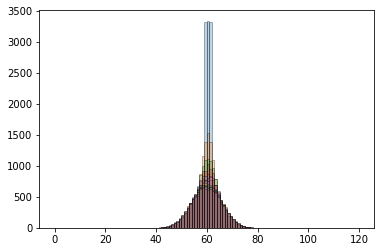

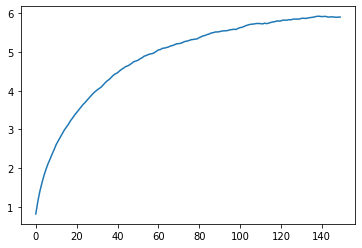

In [30]:
number_of_links = 0
bins=[i for i in range(0,121)]

population =[Agent() for _ in range(10000)]
#network = nx.erdos_renyi_graph(len(population),number_of_links/len(population))
network = nx.watts_strogatz_graph(len(population),number_of_links,number_of_links/len(population))
edges = list(network.edges())
for edge in edges:
    a1 = population[edge[0]]
    a2 = population[edge[1]]
    a1.add_edge(a2)
    a2.add_edge(a1)
mean = 60
plots=[]
stds=[]
for i in range(150):
    count=0
    d=[]
    for agent in population:
        count+=agent.pos
        agent.diffuse(mean)
        d.append(agent.pos)
    if i % 10 ==0:
        plt.hist([a.pos for a in population],alpha=0.3,edgecolor="black",bins=bins)
    mean = count/len(population)
    stds.append(np.std(d))
plt.show()
plt.plot(stds)
plt.show()
        

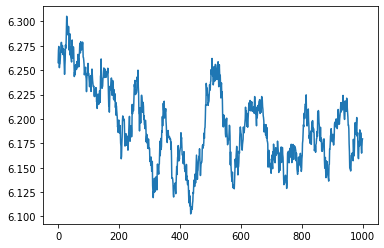

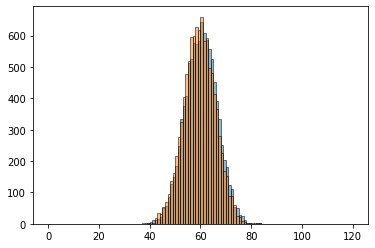

In [31]:
for i in range(2000):
    count=0
    for agent in population:
        count+=agent.pos
        agent.diffuse(mean)

    mean = count/len(population)
data1 = [a.pos for a in population]


stds=[]
for i in range(1000):
    count=0
    d=[]
    for agent in population:
        count+=agent.pos
        agent.diffuse(mean)
        d.append(agent.pos)
    mean = count/len(population)
    stds.append(np.std(d))
plt.plot(stds)
plt.show()
        
data2 = [a.pos for a in population]
n1,bins,pat = plt.hist(data1,alpha=0.5,edgecolor="black",bins=bins)
n2,bins,pat = plt.hist(data2,alpha=0.5,edgecolor="black",bins=bins)
plt.show()

In [32]:
print(np.mean(data1),np.std(data1))
print(np.mean(data2),np.std(data2))

60.158587606963884 6.263358228347227
59.53415436220979 6.179501508192087


120 120
RMSE: 10.552578501598232
R-squared: 0.9963213186224065


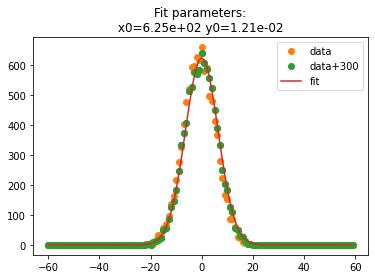

In [33]:
xdata = [i for i in range(-60,60)]
ydata1 = n2
ydata = n1
print(len(xdata),len(ydata))
  
# Recast xdata and ydata into numpy arrays so we can use their handy features
xdata = np.asarray(xdata)
ydata = np.asarray(ydata)
plt.plot(xdata, ydata, 'o')
  
# Define the Gaussian function
def Gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y

p0 = [1., 1., 1.]
fit, covariance = curve_fit(Gauss, xdata,ydata)
  
fit_A = fit[0]
fit_B = fit[1]
  
fit_y = Gauss(xdata, fit_A, fit_B)
plt.title('Fit parameters:\n x0=%.2e y0=%.2e ' % (fit[0], fit[1]))

plt.plot(xdata, ydata1, 'o', label='data')
plt.plot(xdata, ydata, 'o', label='data+300') 
plt.plot(xdata, fit_y, '-', label='fit')
plt.legend()



absError = fit_y - ydata

SE = np.square(absError) # squared errors
MSE = np.mean(SE) # mean squared errors
RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (np.var(absError) / np.var(ydata))


print('RMSE:', RMSE)
print('R-squared:', Rsquared)